In [1]:
library(ggplot2)
library(dplyr)
library(readr)
library(DESeq2)
library(DiffBind)
library(tidyr)
library(wesanderson)
library(viridis)
library(gplots)
library(pheatmap)
library(ggplot)
library(RColorBrewer)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: S4Vectors
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: 'BiocGenerics'

The following objects are masked from 'package:parallel':

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from 'package:dplyr':

    combine, intersect, setdiff, union

The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs

The following objects are masked from 'package:base':

    Filter,

ERROR: Error in library(ggplot): there is no package called 'ggplot'


## 36h blastoids +/- PRC2i

In [3]:
setwd('/lustre1/project/stg_00041/Irene/EZH2i_qPCR_IF_analysis/Blastoid_quantification/')

In [7]:
IF <- read.delim("36h_PRC2i_NANOG_GATA3_FOXA2_blastoids.txt")

In [8]:
head(IF)

condition,percentage_cells
36h_NANOG,64.58333
36h_NANOG,64.60177
36h_NANOG,49.05660
36h_NANOG,45.90164
36h_NANOG,51.92308
36h_NANOG,61.01695


In [10]:
IF$condition <- factor(IF$condition, levels = c("36h_NANOG", "36h_PRC2i_NANOG", "36h_GATA3", "36h_PRC2i_GATA3","36h_FOXA2", "36h_PRC2i_FOXA2"))

In [134]:
options(repr.plot.width=4.7, repr.plot.height=5)
plot <- ggplot(IF, aes(x= condition, y= percentage_cells, fill = condition)) + 
#geom_jitter(width = .1, alpha = 1, show.legend=FALSE, aes(color = "black")) +
geom_point(size = 1, alpha = 1)+
#scale_fill_manual(values=c("green", "green", "magenta", "magenta", "yellow", "yellow")) +
geom_boxplot(alpha=0.5, width = 0.5)+ #aes(color = condition)
scale_fill_manual(values=c("green3", "green3", "magenta3", "magenta3", "yellow3", "yellow3")) +
#scale_color_manual(values=c("green", "green", "magenta", "magenta", "yellow", "yellow")) +
scale_alpha_manual(values=c(0.5,0.5,0.5,0.5,0.5,0.5)) +
ylim(0, 100)+
#geom_bar(stat="identity",position=position_dodge2(reverse=TRUE), width = 0.7)+
guides(fill = guide_legend(reverse = TRUE))+


 #scale_fill_manual(color = "grey63")+
 #scale_color_manual(color = "grey63")+


  theme(plot.title = element_text(size=14, hjust = 0.5))+
    xlab("") + 
    ylab("Ratio of individual lineages (%)")+
    #ggtitle("")+
    theme(legend.title=element_blank())+
    theme(axis.text.x  = element_text(angle=90, vjust=0, hjust=1, size=10, colour = "black"))+
    theme(axis.text.y  = element_text(angle=0, vjust=0.5, hjust=0.5, size=10, colour = "black"))+
    theme(axis.line = element_line(colour = "black"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.border = element_rect(colour="black", fill = NA, size = 1),
    panel.background = element_blank())

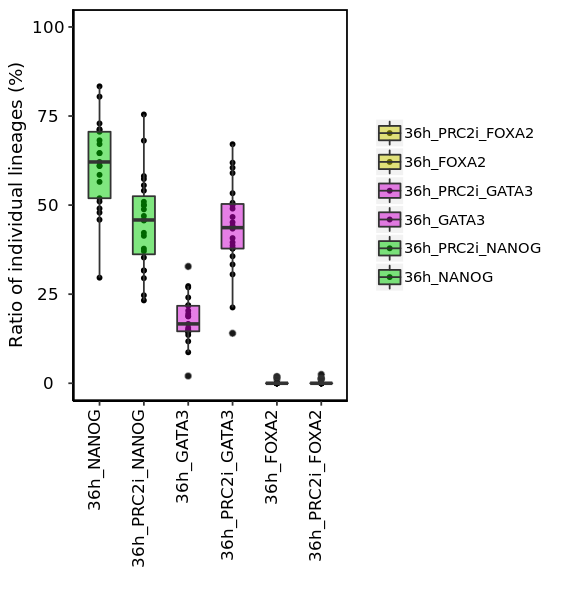

In [135]:
plot

In [136]:
setwd('/lustre1/project/stg_00041/Irene/EZH2i_qPCR_IF_analysis/Blastoid_quantification/')
pdf(paste0("ratio_ind_lineages_36h.pdf"), useDingbats = FALSE, height=5, width=4.7)
plot
dev.off()

png 
  2

In [137]:
IF$percentage_cells <- as.numeric(IF$percentage_cells)

In [142]:
wilcox_1 <- pairwise.wilcox.test(IF$percentage_cells, IF$condition, p.adjust.method = "bonferroni")

Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
"cannot compute exact p-value with ties"Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
"cannot compute exact p-value with ties"Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
"cannot compute exact p-value with ties"Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
"cannot compute exact p-value with ties"Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
"cannot compute exact p-value with ties"Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
"cannot compute exact p-value with ties"Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
"cannot compute exact p-value with ties"Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
"cannot compute exact p-value with ties"Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
"cannot compute exact p-value with ties"Warning me

In [143]:
wilcox_1$p.value

,36h_NANOG,36h_PRC2i_NANOG,36h_GATA3,36h_PRC2i_GATA3,36h_FOXA2
36h_PRC2i_NANOG,3.698835e-03,NA,NA,NA,NA
36h_GATA3,1.114707e-10,8.540251e-07,NA,NA,NA
36h_PRC2i_GATA3,3.150522e-04,1.000000e+00,1.092608e-07,NA,NA
36h_FOXA2,1.223209e-07,6.654281e-08,1.223209e-07,6.672107e-08,NA
36h_PRC2i_FOXA2,5.292370e-08,2.688908e-08,6.138583e-08,2.695541e-08,1


In [161]:
ttest1 <- pairwise.t.test(IF$percentage_cells, IF$condition, p.adjust.method = "bonferroni")

In [162]:
ttest1$p.value

,36h_NANOG,36h_PRC2i_NANOG,36h_GATA3,36h_PRC2i_GATA3,36h_FOXA2
36h_PRC2i_NANOG,1.794862e-06,NA,NA,NA,NA
36h_GATA3,2.527231e-28,1.668284e-15,NA,NA,NA
36h_PRC2i_GATA3,1.215918e-07,1.000000e+00,3.944754e-14,NA,NA
36h_FOXA2,1.612224e-41,2.622769e-30,2.990755e-07,5.492235e-29,NA
36h_PRC2i_FOXA2,1.945097e-42,4.006185e-31,1.686254e-07,8.811283e-30,1


In [84]:
total_cell_nr <- read.delim("36h_PRC2i_NANOG_GATA3_FOXA2_cell_nr_per_blastoid.txt")

In [91]:
total_cell_nr$condition <- factor(total_cell_nr$condition, levels = c("36h_NANOG", "36h_PRC2i_NANOG", "36h_GATA3", "36h_PRC2i_GATA3","36h_FOXA2", "36h_PRC2i_FOXA2"))

In [128]:
options(repr.plot.width=4.7, repr.plot.height=5)
plot2 <- ggplot(total_cell_nr, aes(x= condition, y= cell_nr_per_blastoid, fill = condition)) + 
#geom_jitter(width = .1, alpha = 1, show.legend=FALSE, aes(color = "black")) +
geom_point(size = 1, alpha = 1)+
#scale_fill_manual(values=c("green", "green", "magenta", "magenta", "yellow", "yellow")) +
geom_boxplot(alpha=0.5, width = 0.5)+ #aes(color = condition)
scale_fill_manual(values=c("green3", "green3", "magenta3", "magenta3", "yellow3", "yellow3")) +
#scale_color_manual(values=c("green", "green", "magenta", "magenta", "yellow", "yellow")) +
scale_alpha_manual(values=c(0.5,0.5,0.5,0.5,0.5,0.5)) +
#ylim(0, 100)+
#geom_bar(stat="identity",position=position_dodge2(reverse=TRUE), width = 0.7)+
guides(fill = guide_legend(reverse = TRUE))+


 #scale_fill_manual(color = "grey63")+
 #scale_color_manual(color = "grey63")+


  theme(plot.title = element_text(size=14, hjust = 0.5))+
    xlab("") + 
    ylab("Cell number per blastoid")+
    #ggtitle("")+
    theme(legend.title=element_blank())+
    theme(axis.text.x  = element_text(angle=90, vjust=0, hjust=1, size=10, colour = "black"))+
    theme(axis.text.y  = element_text(angle=0, vjust=0.5, hjust=0.5, size=10, colour = "black"))+
    theme(axis.line = element_line(colour = "black"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.border = element_rect(colour="black", fill = NA, size = 1),
    panel.background = element_blank())

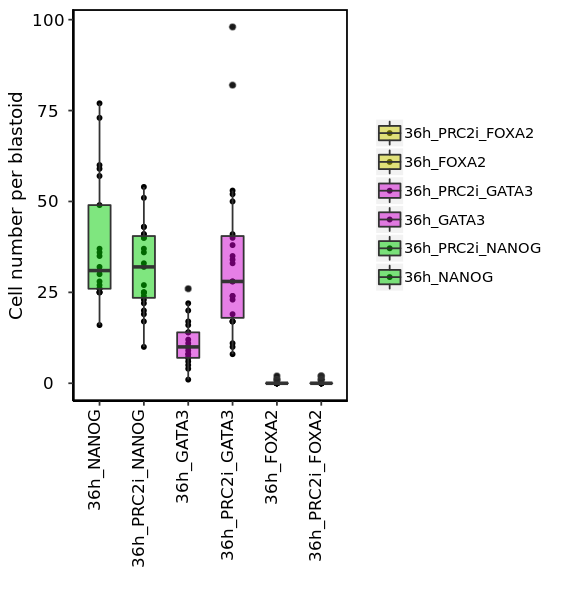

In [129]:
plot2

In [130]:
setwd('/lustre1/project/stg_00041/Irene/EZH2i_qPCR_IF_analysis/Blastoid_quantification/')
pdf(paste0("cell_nr_per_blastoid_36h.pdf"), useDingbats = FALSE, height=5, width=4.7)
plot2
dev.off()

png 
  2

In [144]:
total_cell_nr$cell_nr_per_blastoid <- as.numeric(total_cell_nr$cell_nr_per_blastoid)

In [145]:
wilcox_2 <- pairwise.wilcox.test(total_cell_nr$cell_nr_per_blastoid, total_cell_nr$condition, p.adjust.method = "bonferroni")

Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
"cannot compute exact p-value with ties"Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
"cannot compute exact p-value with ties"Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
"cannot compute exact p-value with ties"Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
"cannot compute exact p-value with ties"Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
"cannot compute exact p-value with ties"Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
"cannot compute exact p-value with ties"Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
"cannot compute exact p-value with ties"Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
"cannot compute exact p-value with ties"Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
"cannot compute exact p-value with ties"Warning me

In [146]:
wilcox_2$p.value

,36h_NANOG,36h_PRC2i_NANOG,36h_GATA3,36h_PRC2i_GATA3,36h_FOXA2
36h_PRC2i_NANOG,1.000000e+00,NA,NA,NA,NA
36h_GATA3,1.521750e-06,6.424296e-06,NA,NA,NA
36h_PRC2i_GATA3,1.000000e+00,1.000000e+00,9.990516e-05,NA,NA
36h_FOXA2,1.210399e-07,6.601055e-08,1.639934e-07,6.609899e-08,NA
36h_PRC2i_FOXA2,5.234551e-08,2.665809e-08,8.112515e-08,2.669098e-08,1


In [159]:
ttest2 <- pairwise.t.test(total_cell_nr$cell_nr_per_blastoid, total_cell_nr$condition, p.adjust.method = "bonferroni")

In [160]:
ttest2$p.value

,36h_NANOG,36h_PRC2i_NANOG,36h_GATA3,36h_PRC2i_GATA3,36h_FOXA2
36h_PRC2i_NANOG,1.000000e+00,NA,NA,NA,NA
36h_GATA3,3.061039e-09,6.645255e-06,NA,NA,NA
36h_PRC2i_GATA3,1.000000e+00,1.000000e+00,3.866855e-07,NA,NA
36h_FOXA2,6.379792e-16,3.013330e-12,7.927246e-02,1.041832e-13,NA
36h_PRC2i_FOXA2,2.062536e-16,1.163429e-12,6.931149e-02,3.653880e-14,1


In [4]:
total_cell_nr_per_blastoid <- read.delim("36h_PRC2i_total_nr_cell_per_blastoid.txt")

In [5]:
total_cell_nr_per_blastoid$condition <- factor(total_cell_nr_per_blastoid$condition, levels = c("36h", "36h_PRC2i"))

In [6]:
head(total_cell_nr_per_blastoid)

condition,total_nr_nuclei_per_blastoid
36h,48
36h,113
36h,53
36h,61
36h,52
36h,59


In [9]:
options(repr.plot.width=3, repr.plot.height=4)
plot3 <- ggplot(total_cell_nr_per_blastoid, aes(x= condition, y= total_nr_nuclei_per_blastoid, fill = condition)) + 
#geom_jitter(width = .1, alpha = 1, show.legend=FALSE, aes(color = "black")) +
geom_point(size = 1, alpha = 1)+
#scale_fill_manual(values=c("green", "green", "magenta", "magenta", "yellow", "yellow")) +
geom_boxplot(alpha=0.5, width= 0.4, show.legend=FALSE)+ #aes(color = condition)
scale_fill_manual(values=c("blue", "blue")) +
#scale_color_manual(values=c("green", "green", "magenta", "magenta", "yellow", "yellow")) +
scale_alpha_manual(values=c(0.5,0.5)) +
ylim(0, 170)+
#geom_bar(stat="identity",position=position_dodge2(reverse=TRUE), width = 0.7)+
guides(fill = guide_legend(reverse = TRUE))+


 #scale_fill_manual(color = "grey63")+
 #scale_color_manual(color = "grey63")+


  theme(plot.title = element_text(size=14, hjust = 0.5))+
    xlab("") + 
    ylab("Total number of nuclei per blastoid")+
    #ggtitle("")+
    theme(legend.title=element_blank())+
    theme(axis.text.x  = element_text(angle=90, vjust=0, hjust=1, size=10, colour = "black"))+
    theme(axis.text.y  = element_text(angle=0, vjust=0.5, hjust=0.5, size=10, colour = "black"))+
    theme(axis.line = element_line(colour = "black"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.border = element_rect(colour="black", fill = NA, size = 1),
    panel.background = element_blank())

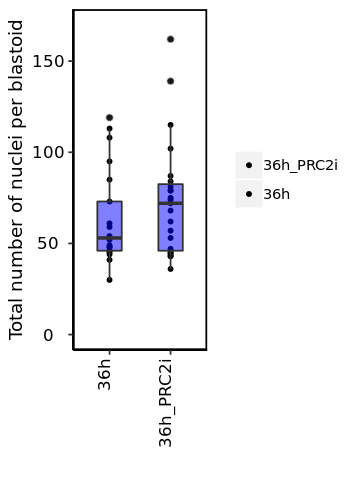

In [10]:
plot3

In [11]:
setwd('/lustre1/project/stg_00041/Irene/EZH2i_qPCR_IF_analysis/Blastoid_quantification/')
pdf(paste0("total_cell_nr_per_blastoid_36h_yaxis0.pdf"), useDingbats = FALSE, height=4, width=3)
plot3
dev.off()

png 
  2

In [147]:
total_cell_nr_per_blastoid$total_nr_nuclei_per_blastoid <- as.numeric(total_cell_nr_per_blastoid$total_nr_nuclei_per_blastoid)

In [157]:
wilcox_3 <- pairwise.wilcox.test(total_cell_nr_per_blastoid$total_nr_nuclei_per_blastoid, total_cell_nr_per_blastoid$condition, p.adjust.method = "bonferroni")

Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
"cannot compute exact p-value with ties"

In [158]:
wilcox_3$p.value

,36h
36h_PRC2i,0.341066


In [155]:
ttest <- pairwise.t.test(total_cell_nr_per_blastoid$total_nr_nuclei_per_blastoid, total_cell_nr_per_blastoid$condition, p.adjust.method = "bonferroni")

In [156]:
ttest$p.value

,36h
36h_PRC2i,0.2336576


## 60h blastoids +/- PRC2i

In [4]:
IF <- read.delim("60h_PRC2i_NANOG_GATA3_FOXA2_blastoids.txt")

In [5]:
head(IF)

condition,percentage_cells
60h_NANOG,9.859155
60h_NANOG,25.423729
60h_NANOG,32.653061
60h_NANOG,25.000000
60h_NANOG,15.217391
60h_NANOG,39.784946


In [6]:
IF$condition <- factor(IF$condition, levels = c("60h_NANOG", "60h_PRC2i_NANOG", "60h_GATA3", "60h_PRC2i_GATA3","60h_FOXA2", "60h_PRC2i_FOXA2"))

In [7]:
options(repr.plot.width=4.7, repr.plot.height=5)
plot <- ggplot(IF, aes(x= condition, y= percentage_cells, fill = condition)) + 
#geom_jitter(width = .1, alpha = 1, show.legend=FALSE, aes(color = "black")) +
geom_point(size = 1, alpha = 1)+
#scale_fill_manual(values=c("green", "green", "magenta", "magenta", "yellow", "yellow")) +
geom_boxplot(alpha=0.5, width = 0.5)+ #aes(color = condition)
scale_fill_manual(values=c("green3", "green3", "magenta3", "magenta3", "yellow3", "yellow3")) +
#scale_color_manual(values=c("green", "green", "magenta", "magenta", "yellow", "yellow")) +
scale_alpha_manual(values=c(0.5,0.5,0.5,0.5,0.5,0.5)) +
ylim(0, 100)+
#geom_bar(stat="identity",position=position_dodge2(reverse=TRUE), width = 0.7)+
guides(fill = guide_legend(reverse = TRUE))+


 #scale_fill_manual(color = "grey63")+
 #scale_color_manual(color = "grey63")+


  theme(plot.title = element_text(size=14, hjust = 0.5))+
    xlab("") + 
    ylab("Ratio of individual lineages (%)")+
    #ggtitle("")+
    theme(legend.title=element_blank())+
    theme(axis.text.x  = element_text(angle=90, vjust=0, hjust=1, size=10, colour = "black"))+
    theme(axis.text.y  = element_text(angle=0, vjust=0.5, hjust=0.5, size=10, colour = "black"))+
    theme(axis.line = element_line(colour = "black"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.border = element_rect(colour="black", fill = NA, size = 1),
    panel.background = element_blank())

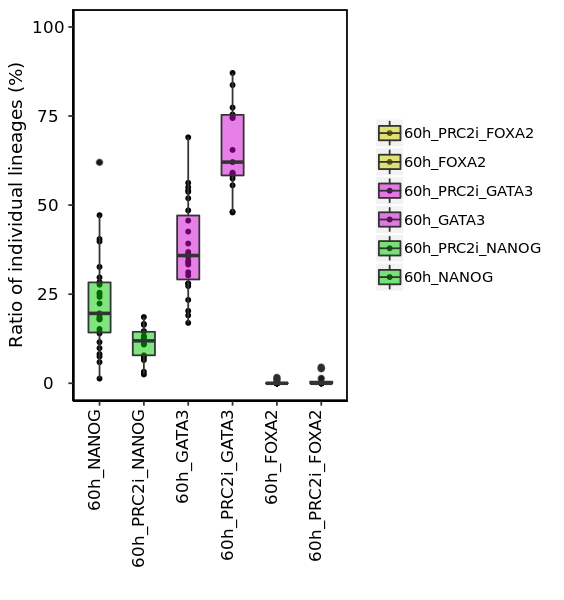

In [8]:
plot

In [9]:
setwd('/lustre1/project/stg_00041/Irene/EZH2i_qPCR_IF_analysis/Blastoid_quantification/')
pdf(paste0("ratio_ind_lineages_60h.pdf"), useDingbats = FALSE, height=5, width=4.7)
plot
dev.off()

png 
  2

In [10]:
IF$percentage_cells <- as.numeric(IF$percentage_cells)

In [11]:
wilcox_1 <- pairwise.wilcox.test(IF$percentage_cells, IF$condition, p.adjust.method = "bonferroni")

Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
"cannot compute exact p-value with ties"Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
"cannot compute exact p-value with ties"Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
"cannot compute exact p-value with ties"Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
"cannot compute exact p-value with ties"Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
"cannot compute exact p-value with ties"Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
"cannot compute exact p-value with ties"Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
"cannot compute exact p-value with ties"Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
"cannot compute exact p-value with ties"Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
"cannot compute exact p-value with ties"

In [12]:
wilcox_1$p.value

,60h_NANOG,60h_PRC2i_NANOG,60h_GATA3,60h_PRC2i_GATA3,60h_FOXA2
60h_PRC2i_NANOG,1.051553e-02,NA,NA,NA,NA
60h_GATA3,6.995821e-04,8.741847e-11,NA,NA,NA
60h_PRC2i_GATA3,2.928519e-09,1.285564e-08,2.499294e-07,NA,NA
60h_FOXA2,1.060892e-09,3.756798e-08,8.339217e-10,3.756798e-08,NA
60h_PRC2i_FOXA2,6.424944e-07,1.755534e-05,3.688396e-07,5.907283e-06,1


In [13]:
ttest1 <- pairwise.t.test(IF$percentage_cells, IF$condition, p.adjust.method = "bonferroni")

In [14]:
ttest1$p.value

,60h_NANOG,60h_PRC2i_NANOG,60h_GATA3,60h_PRC2i_GATA3,60h_FOXA2
60h_PRC2i_NANOG,3.011669e-03,NA,NA,NA,NA
60h_GATA3,8.630910e-07,7.472899e-14,NA,NA,NA
60h_PRC2i_GATA3,2.400458e-27,4.086427e-32,5.303560e-15,NA,NA
60h_FOXA2,3.981625e-13,4.324688e-03,3.744993e-27,7.874586e-44,NA
60h_PRC2i_FOXA2,3.662083e-10,2.971766e-02,2.092378e-22,4.912422e-39,1


In [41]:
total_cell_nr <- read.delim("60h_PRC2i_NANOG_GATA3_FOXA2_cell_nr_per_blastoid.txt")

In [42]:
total_cell_nr$condition <- factor(total_cell_nr$condition, levels = c("60h_NANOG", "60h_PRC2i_NANOG", "60h_GATA3", "60h_PRC2i_GATA3","60h_FOXA2", "60h_PRC2i_FOXA2"))

In [43]:
head(total_cell_nr)

condition,cell_nr_per_blastoid
60h_NANOG,7
60h_NANOG,15
60h_NANOG,32
60h_NANOG,12
60h_NANOG,7
60h_NANOG,37


In [44]:
options(repr.plot.width=4.7, repr.plot.height=5)
plot2 <- ggplot(total_cell_nr, aes(x= condition, y= cell_nr_per_blastoid, fill = condition)) + 
#geom_jitter(width = .1, alpha = 1, show.legend=FALSE, aes(color = "black")) +
geom_point(size = 1, alpha = 1)+
#scale_fill_manual(values=c("green", "green", "magenta", "magenta", "yellow", "yellow")) +
geom_boxplot(alpha=0.5, width = 0.5)+ #aes(color = condition)
scale_fill_manual(values=c("green3", "green3", "magenta3", "magenta3", "yellow3", "yellow3")) +
#scale_color_manual(values=c("green", "green", "magenta", "magenta", "yellow", "yellow")) +
scale_alpha_manual(values=c(0.5,0.5,0.5,0.5,0.5,0.5)) +
#ylim(0, 100)+
#geom_bar(stat="identity",position=position_dodge2(reverse=TRUE), width = 0.7)+
guides(fill = guide_legend(reverse = TRUE))+


 #scale_fill_manual(color = "grey63")+
 #scale_color_manual(color = "grey63")+


  theme(plot.title = element_text(size=14, hjust = 0.5))+
    xlab("") + 
    ylab("Cell number per blastoid")+
    #ggtitle("")+
    theme(legend.title=element_blank())+
    theme(axis.text.x  = element_text(angle=90, vjust=0, hjust=1, size=10, colour = "black"))+
    theme(axis.text.y  = element_text(angle=0, vjust=0.5, hjust=0.5, size=10, colour = "black"))+
    theme(axis.line = element_line(colour = "black"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.border = element_rect(colour="black", fill = NA, size = 1),
    panel.background = element_blank())

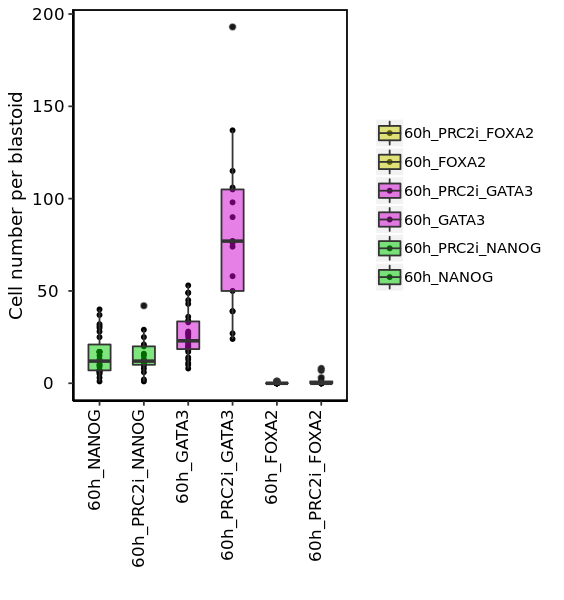

In [45]:
plot2

In [46]:
setwd('/lustre1/project/stg_00041/Irene/EZH2i_qPCR_IF_analysis/Blastoid_quantification/')
pdf(paste0("cell_nr_per_blastoid_60h.pdf"), useDingbats = FALSE, height=5, width=4.7)
plot2
dev.off()

png 
  2

In [47]:
total_cell_nr$cell_nr_per_blastoid <- as.numeric(total_cell_nr$cell_nr_per_blastoid)

In [48]:
wilcox_2 <- pairwise.wilcox.test(total_cell_nr$cell_nr_per_blastoid, total_cell_nr$condition, p.adjust.method = "bonferroni")

Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
"cannot compute exact p-value with ties"Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
"cannot compute exact p-value with ties"Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
"cannot compute exact p-value with ties"Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
"cannot compute exact p-value with ties"Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
"cannot compute exact p-value with ties"Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
"cannot compute exact p-value with ties"Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
"cannot compute exact p-value with ties"Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
"cannot compute exact p-value with ties"Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
"cannot compute exact p-value with ties"Warning me

In [49]:
wilcox_2$p.value

,60h_NANOG,60h_PRC2i_NANOG,60h_GATA3,60h_PRC2i_GATA3,60h_FOXA2
60h_PRC2i_NANOG,1.000000e+00,NA,NA,NA,NA
60h_GATA3,1.863957e-02,3.026417e-02,NA,NA,NA
60h_PRC2i_GATA3,3.662385e-06,3.521561e-05,3.870992e-05,NA,NA
60h_FOXA2,1.023424e-09,4.980105e-08,8.233914e-10,3.689738e-08,NA
60h_PRC2i_FOXA2,3.799941e-06,3.813117e-05,3.932726e-07,5.882169e-06,1


In [50]:
ttest2 <- pairwise.t.test(total_cell_nr$cell_nr_per_blastoid, total_cell_nr$condition, p.adjust.method = "bonferroni")

In [51]:
ttest2$p.value

,60h_NANOG,60h_PRC2i_NANOG,60h_GATA3,60h_PRC2i_GATA3,60h_FOXA2
60h_PRC2i_NANOG,1.000000e+00,NA,NA,NA,NA
60h_GATA3,4.381250e-01,5.320710e-01,NA,NA,NA
60h_PRC2i_GATA3,1.092217e-21,3.281225e-19,6.246875e-17,NA,NA
60h_FOXA2,2.029042e-02,1.201640e-01,3.278870e-06,1.290531e-28,NA
60h_PRC2i_FOXA2,1.248968e-01,3.914434e-01,1.402455e-04,1.046077e-24,1


In [30]:
total_cell_nr_per_blastoid <- read.delim("60h_PRC2i_total_nr_cell_per_blastoid.txt")

In [31]:
total_cell_nr_per_blastoid$condition <- factor(total_cell_nr_per_blastoid$condition, levels = c("60h", "60h_PRC2i"))

In [32]:
head(total_cell_nr_per_blastoid)

condition,total_nr_nuclei_per_blastoid
60h,71
60h,59
60h,98
60h,48
60h,46
60h,93


In [33]:
options(repr.plot.width=3, repr.plot.height=4)
plot3 <- ggplot(total_cell_nr_per_blastoid, aes(x= condition, y= total_nr_nuclei_per_blastoid, fill = condition)) + 
#geom_jitter(width = .1, alpha = 1, show.legend=FALSE, aes(color = "black")) +
geom_point(size = 1, alpha = 1)+
#scale_fill_manual(values=c("green", "green", "magenta", "magenta", "yellow", "yellow")) +
geom_boxplot(alpha=0.5, width= 0.4, show.legend=FALSE)+ #aes(color = condition)
scale_fill_manual(values=c("blue", "blue")) +
#scale_color_manual(values=c("green", "green", "magenta", "magenta", "yellow", "yellow")) +
scale_alpha_manual(values=c(0.5,0.5)) +
#ylim(0, 100)+
#geom_bar(stat="identity",position=position_dodge2(reverse=TRUE), width = 0.7)+
guides(fill = guide_legend(reverse = TRUE))+


 #scale_fill_manual(color = "grey63")+
 #scale_color_manual(color = "grey63")+


  theme(plot.title = element_text(size=14, hjust = 0.5))+
    xlab("") + 
    ylab("Total number of nuclei per blastoid")+
    #ggtitle("")+
    theme(legend.title=element_blank())+
    theme(axis.text.x  = element_text(angle=90, vjust=0, hjust=1, size=10, colour = "black"))+
    theme(axis.text.y  = element_text(angle=0, vjust=0.5, hjust=0.5, size=10, colour = "black"))+
    theme(axis.line = element_line(colour = "black"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.border = element_rect(colour="black", fill = NA, size = 1),
    panel.background = element_blank())

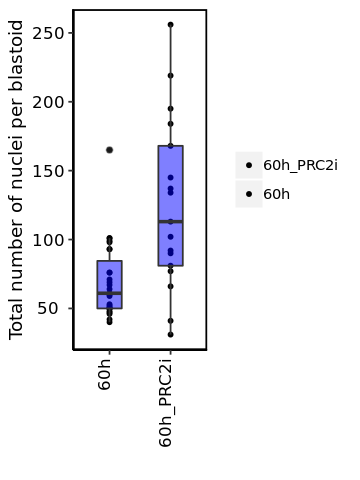

In [34]:
plot3

In [35]:
setwd('/lustre1/project/stg_00041/Irene/EZH2i_qPCR_IF_analysis/Blastoid_quantification/')
pdf(paste0("total_cell_nr_per_blastoid_60h.pdf"), useDingbats = FALSE, height=4, width=3)
plot3
dev.off()

png 
  2

In [36]:
total_cell_nr_per_blastoid$total_nr_nuclei_per_blastoid <- as.numeric(total_cell_nr_per_blastoid$total_nr_nuclei_per_blastoid)

In [37]:
wilcox_3 <- pairwise.wilcox.test(total_cell_nr_per_blastoid$total_nr_nuclei_per_blastoid, total_cell_nr_per_blastoid$condition, p.adjust.method = "bonferroni")

Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
"cannot compute exact p-value with ties"

In [38]:
wilcox_3$p.value

,60h
60h_PRC2i,0.001586799


In [39]:
ttest <- pairwise.t.test(total_cell_nr_per_blastoid$total_nr_nuclei_per_blastoid, total_cell_nr_per_blastoid$condition, p.adjust.method = "bonferroni")

In [40]:
ttest$p.value

,60h
60h_PRC2i,0.0002195294
